In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

### Use the data on student grades from this lesson.

In [45]:
df = wrangle.wrangle_grades()

df

,exam1,exam2,exam3,final_grade
0,100,90,95,96
1,98,93,96,95
2,85,83,87,87
3,83,80,86,85
4,93,90,96,97
...,...,...,...,...
99,70,65,78,77
100,62,70,79,70
101,58,65,70,68
102,57,65,75,65


### Split the data into train, validate, and test datasets.

In [46]:
train_and_validate, test = train_test_split(df, random_state = 123)
train, validate = train_test_split(train_and_validate, random_state = 123)

X_train = train.drop(columns='final_grade')
y_train = train[['final_grade']]

X_validate = validate.drop(columns="final_grade")
y_validate = validate[["final_grade"]]

X_test = test.drop(columns='final_grade')
y_test = test[['final_grade']]

### Create a model that uses exam 1 to predict the final grade.

In [47]:
# creating copy of y train since we'll be creating new columns and we don't want to alter the original
y_train_m1 = y_train.copy()

# creating linear regression object
lm_m1 = LinearRegression()

# fitting LR object to feature and targeted variable
lm_m1.fit(X_train[['exam1']], y_train_m1)

# creating new column that holds model predictions
y_train_m1['yhat_lm_m1'] = lm_m1.predict(X_train[['exam1']])

# creating new column that holds the residual of each row (predicted minus actual)
y_train_m1['residual'] = y_train_m1['yhat_lm_m1'] - y_train_m1['final_grade']

# displaying results
y_train_m1.head()

,final_grade,yhat_lm_m1,residual
10,68,66.245821,-1.754179
15,87,86.693733,-0.306267
42,85,85.179072,0.179072
51,72,75.333782,3.333782
46,76,77.605772,1.605772


### Create a model that uses exam 2 to predict the final grade.

In [48]:
# creating copy of y train since we'll be creating new columns and we don't want to alter the original
y_train_m2 = y_train.copy()

# creating linear regression object
lm_m2 = LinearRegression()

# fitting LR object to feature and targeted variable
lm_m2.fit(X_train[['exam2']], y_train_m2)

# creating new column that holds model predictions
y_train_m2['yhat_lm_m2'] = lm_m2.predict(X_train[['exam2']])

# creating new column that holds the residual of each row (predicted minus actual)
y_train_m2['residual'] = y_train_m2['yhat_lm_m2'] - y_train_m2['final_grade']

# displaying results
y_train_m2.head()

,final_grade,yhat_lm_m2,residual
10,68,69.406878,1.406878
15,87,87.047586,0.047586
42,85,84.107468,-0.892532
51,72,79.207271,7.207271
46,76,74.307075,-1.692925


### Compare your models in the following manner:

### Calculate the mean squared error

In [49]:
# calculating mean squared error
RMSE_lm_m1 = np.sqrt(mean_squared_error(y_train_m1.final_grade, y_train_m1.yhat_lm_m1))

# printing results
print("linear model 1 (training set)\n  Root mean squared error: {:.3}".format(RMSE_lm_m1))

# calculating mean squared error
RMSE_lm_m2 = np.sqrt(mean_squared_error(y_train_m2.final_grade, y_train_m2.yhat_lm_m2))

# printing results
print("\nlinear model 2 (training set)\n  Root mean squared error: {:.3}".format(RMSE_lm_m2))


linear model 1 (training set)
  Root mean squared error: 1.83

linear model 2 (training set)
  Root mean squared error: 3.76


### Visualize the residuals. Create a seperate visualization for each model.

Text(0.5, 1.0, 'Model 1: Exam 1 Grade vs Residual')

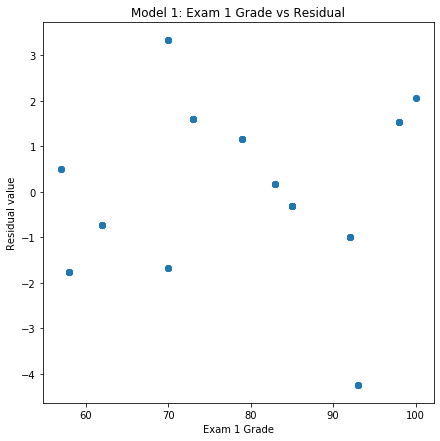

In [50]:
# Model 1 Residuals Visualization

# setting figure size
plt.figure(figsize=(7, 7))

# specifying scatterplot, x = actual, y = model 1 prediction, 
plt.scatter(X_train[['exam1']], y_train_m1.residual)

# setting labels for x and y axis
plt.ylabel('Residual value')
plt.xlabel('Exam 1 Grade')

# setting title
plt.title('Model 1: Exam 1 Grade vs Residual')

Text(0.5, 1.0, 'Model 2: Exam 1 Grade vs Residual')

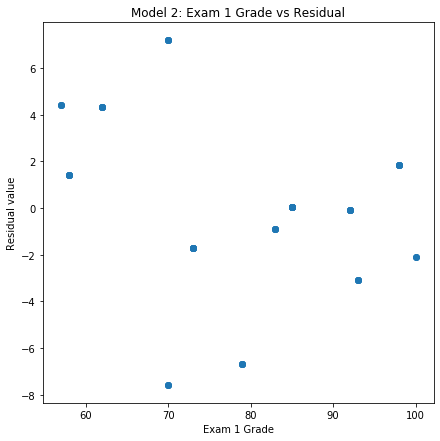

In [51]:
# Model 2 Residuals Visualization

# setting figure size
plt.figure(figsize=(7, 7))

# specifying scatterplot, x = actual, y = model 2 prediction, 
plt.scatter(X_train[['exam1']], y_train_m2.residual)

# setting labels for x and y axis
plt.ylabel('Residual value')
plt.xlabel('Exam 1 Grade')

# setting title
plt.title('Model 2: Exam 1 Grade vs Residual')

### Visualize the actual vs the predicted values. Create a seperate visualization for each model.

Text(0.5, 1.0, 'Model 1: Predicted vs Actual Final Grade')

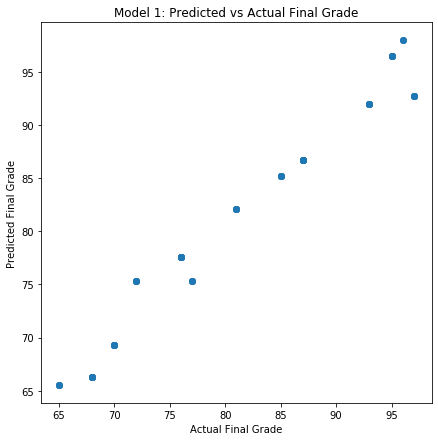

In [52]:
# Model 1 Predicted Values Visualization

# setting figure size
plt.figure(figsize=(7, 7))

# specifying scatterplot, x = actual, y = model 1 prediction 
plt.scatter(y_train_m1.final_grade, y_train_m1.yhat_lm_m1)

# setting labels for x and y axis
plt.ylabel('Predicted Final Grade')
plt.xlabel('Actual Final Grade')

# setting title
plt.title('Model 1: Predicted vs Actual Final Grade')

Text(0.5, 1.0, 'Model 2: Predicted vs Actual Final Grade')

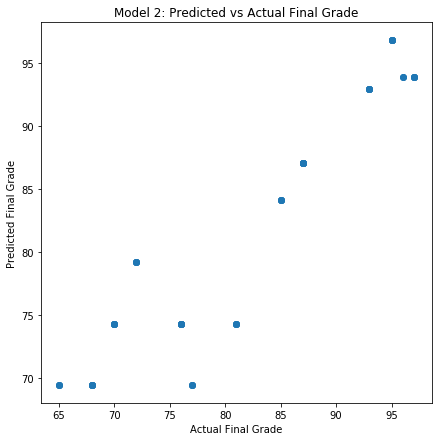

In [53]:
# Model 2 Predicted Values Visualization

# setting figure size
plt.figure(figsize=(7, 7))

# specifying scatterplot, x = actual, y = model 2 prediction, 
plt.scatter(y_train_m2.final_grade, y_train_m2.yhat_lm_m2)

# setting labels for x and y axis
plt.ylabel('Predicted Final Grade')
plt.xlabel('Actual Final Grade')

# setting title
plt.title('Model 2: Predicted vs Actual Final Grade')

### Create a model that uses exam 1 and exam 3 to predict final grade. 

In [73]:
# creating copy of y train since we'll be creating new columns and we don't want to alter the original
y_train_m3 = y_train.copy()

# creating linear regression object
lm_m3 = LinearRegression()

# fitting LR object to feature and targeted variable
lm_m3.fit(X_train[['exam1', 'exam3']], y_train_m3)

# creating new column that holds model predictions
y_train_m3['yhat_lm_m3'] = lm_m3.predict(X_train[['exam1', 'exam3']])

# creating new column that holds the residual of each row (predicted minus actual)
y_train_m3['residual'] = y_train_m3['yhat_lm_m3'] - y_train_m3['final_grade']

# displaying results
y_train_m3.head()

,final_grade,yhat_lm_m3,residual
10,68,65.760296,-2.239704
15,87,86.444967,-0.555033
42,85,84.983867,-0.016133
51,72,75.075365,3.075365
46,76,76.032957,0.032957


### How does this model compare to your previous ones?

In [74]:
# calculating mean squared error
RMSE_lm_m1 = np.sqrt(mean_squared_error(y_train_m1.final_grade, y_train_m1.yhat_lm_m1))

# printing results
print("linear model 1 (training set)\n  Root mean squared error: {:.3}".format(RMSE_lm_m1))

# calculating mean squared error
RMSE_lm_m2 = np.sqrt(mean_squared_error(y_train_m2.final_grade, y_train_m2.yhat_lm_m2))

# printing results
print("\nlinear model 2 (training set)\n  Root mean squared error: {:.3}".format(RMSE_lm_m2))

# calculating mean squared error
RMSE_lm_m3 = np.sqrt(mean_squared_error(y_train_m3.final_grade, y_train_m3.yhat_lm_m3))

# printing results
print("\nlinear model 3 (training set)\n  Root mean squared error: {:.3}".format(RMSE_lm_m3))

print("\nModel 3 performed the best since it has the lowest RMSE value.")

linear model 1 (training set)
  Root mean squared error: 1.83

linear model 2 (training set)
  Root mean squared error: 3.76

linear model 3 (training set)
  Root mean squared error: 1.65

Model 3 performed the best since it has the lowest RMSE value.


### Take your best preforming model and measure its performance on the validate data set. 

In [75]:
# making predictions with model 3 on validate data set
validate_m3_predictions = lm_m3.predict(X_validate[['exam1', 'exam3']])

# calculating mean squared error
RMSE_lm_m3_val = np.sqrt(mean_squared_error(y_validate.final_grade, validate_m3_predictions))

# printing results
print("linear model 3 (validate)\n  Root mean squared error: {:.5}".format(RMSE_lm_m3_val))

linear model 3 (validate)
  Root mean squared error: 1.8508


### How does the performance differ between train and validate?

In [76]:
print("Model 3's RMSE value only increased by .20 from the training to the validate set, seems to be a fairly good model.")

Model 3's RMSE value only increased by .20 from the training to the validate set, seems to be a fairly good model.


### Make a 4th model with a slight difference like one more/less feature or a single hyperparameter that's different to see if you can beat that the last model's performance on validate.

In [77]:
# creating copy of y train since we'll be creating new columns and we don't want to alter the original
y_train_m4 = y_train.copy()

# creating linear regression object
lm_m4 = LinearRegression()

# fitting LR object to feature and targeted variable
lm_m4.fit(X_train[['exam1', 'exam2','exam3']], y_train_m4)

# creating new column that holds model predictions
y_train_m4['yhat_lm_m4'] = lm_m4.predict(X_train[['exam1', 'exam2','exam3']])

# creating new column that holds the residual of each row (predicted minus actual)
y_train_m4['residual'] = y_train_m4['yhat_lm_m4'] - y_train_m4['final_grade']

# displaying results
y_train_m4.head()

,final_grade,yhat_lm_m4,residual
10,68,65.721880,-2.278120
15,87,86.422150,-0.577850
42,85,84.987669,-0.012331
51,72,75.017555,3.017555
46,76,76.038134,0.038134


In [78]:
# making predictions with model 4 on validate data set
validate_m4_predictions = lm_m4.predict(X_validate[['exam1', 'exam2', 'exam3']])

# calculating mean squared error
RMSE_lm_m4_val = np.sqrt(mean_squared_error(y_validate.final_grade, validate_m4_predictions))

# printing results
print("linear model 4 (validate)\n  Root mean squared error: {:.5}".format(RMSE_lm_m4_val))

linear model 4 (validate)
  Root mean squared error: 1.8458


### Tune your models using validate to improve performance.

In [89]:
# Tuning model 3 hyper parameters to see if we can improve performance on validate data

# creating linear regression object
lm_m3 = LinearRegression(normalize = True)

# fitting LR object to feature and targeted variable
# need to specify final grade here since our y_train_m3 has additional columns now
lm_m3.fit(X_train[['exam1', 'exam3']], y_train_m3['final_grade'])

# making predictions with model 3 on validate data set
validate_m3_predictions = lm_m3.predict(X_validate[['exam1', 'exam3']])

# calculating mean squared error
RMSE_lm_m3_val = np.sqrt(mean_squared_error(y_validate.final_grade, validate_m3_predictions))

# printing results
print("linear model 3 (validate)\n  Root mean squared error: {:.5}".format(RMSE_lm_m3_val))

print("\nSame RMSE as before, no change.")

linear model 3 (validate)
  Root mean squared error: 1.8508

Same RMSE as before, no change.


In [91]:
# Tuning model 3 hyper parameters again to see if we can improve performance on validate data

# creating linear regression object
lm_m3 = LinearRegression(fit_intercept = False)

# fitting LR object to feature and targeted variable
# need to specify final grade here since our y_train_m3 has additional columns now
lm_m3.fit(X_train[['exam1', 'exam3']], y_train_m3['final_grade'])

# making predictions with model 3 on validate data set
validate_m3_predictions = lm_m3.predict(X_validate[['exam1', 'exam3']])

# calculating mean squared error
RMSE_lm_m3_val = np.sqrt(mean_squared_error(y_validate.final_grade, validate_m3_predictions))

# printing results
print("linear model 3 (validate)\n  Root mean squared error: {:.5}".format(RMSE_lm_m3_val))
print("\nRMSE value increased, this tuning worsened the model's performance.")

linear model 3 (validate)
  Root mean squared error: 1.9441

RMSE value increased, this tuning worsened the model's performance.


In [94]:
# Tuning model 4 hyper parameters to see if we can improve performance on validate data

# creating linear regression object
lm_m4 = LinearRegression(normalize = True)

# fitting LR object to feature and targeted variable
# need to specify final grade here since our y_train_m4 has additional columns now
lm_m4.fit(X_train[['exam1', 'exam2', 'exam3']], y_train_m4['final_grade'])

# making predictions with model 3 on validate data set
validate_m4_predictions = lm_m4.predict(X_validate[['exam1', 'exam2', 'exam3']])

# calculating mean squared error
RMSE_lm_m4_val = np.sqrt(mean_squared_error(y_validate.final_grade, validate_m4_predictions))

# printing results
print("linear model 4 (validate)\n  Root mean squared error: {:.5}".format(RMSE_lm_m4_val))
print("\nRMSE value remains constant, no change.")

linear model 4 (validate)
  Root mean squared error: 1.8458
RMSE value remains constant, no change.


In [96]:
# Tuning model 4 hyper parameters to see if we can improve performance on validate data

# creating linear regression object
lm_m4 = LinearRegression(fit_intercept = False)

# fitting LR object to feature and targeted variable
# need to specify final grade here since our y_train_m4 has additional columns now
lm_m4.fit(X_train[['exam1', 'exam2', 'exam3']], y_train_m4['final_grade'])

# making predictions with model 3 on validate data set
validate_m4_predictions = lm_m4.predict(X_validate[['exam1', 'exam2', 'exam3']])

# calculating mean squared error
RMSE_lm_m4_val = np.sqrt(mean_squared_error(y_validate.final_grade, validate_m4_predictions))

# printing results
print("linear model 4 (validate)\n  Root mean squared error: {:.5}".format(RMSE_lm_m4_val))
print("\nRMSE value increased, this tuning worsened the model's performance.")

linear model 4 (validate)
  Root mean squared error: 1.9424

RMSE value increased, this tuning worsened the model's performance.


<font size=4> Since model 4 performed slightly better than model 3, and it maintained its best performance with no hyperparameters, we're going to use it with no hyperparameters on the test set. </font>

### Select the model w/ the best performance and evaluate that one on test, to get a more clear understanding of how it will perform on out-of-sample data.

In [98]:
# Using model 4 on test set

# creating linear regression object
lm_m4 = LinearRegression()

# fitting LR object to feature and targeted variable
# need to specify final grade here since our y_train_m4 has additional columns now
lm_m4.fit(X_train[['exam1', 'exam2', 'exam3']], y_train_m4['final_grade'])

# making predictions with model 3 on validate data set
test_m4_predictions = lm_m4.predict(X_test[['exam1', 'exam2', 'exam3']])

# calculating mean squared error
RMSE_lm_m4_test = np.sqrt(mean_squared_error(y_test.final_grade, test_m4_predictions))

# printing results
print("linear model 4 (test)\n  Root mean squared error: {:.5}".format(RMSE_lm_m4_test))
print("\nRMSE value increased by ~.02 from validation, this model is solid.")

linear model 4 (test)
  Root mean squared error: 1.8697

RMSE value increased by ~.02 from validation, this model is solid.


### OUR SCENARIO CONTINUES

#### Run all your previous scripts that acquired, prepared, split, and scaled the telco churn data.

In [7]:
# importing functions from my .py files
from acquire import get_telco_data
from wrangle import minmax_scaler
from prepare import prepare_telco

In [8]:
# acquiring data
df = get_telco_data()

df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [9]:
# preparing data via removing blank values and converting total_charges to numeric
train, validate, test = prepare_telco(df)

train.head()

,customer_id,female,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,is_automatic_payment,monthly_charges,total_charges,tenure_years,churn
4604,6490-FGZAT,0,0,0,0,6,1,0,3,0,...,0,0,1,0,2,0,20.65,109.30,0.5,0
5566,7841-FCRQD,1,0,1,0,33,1,0,1,0,...,0,0,2,1,4,1,53.75,1857.30,2.8,0
6204,8777-MBMTS,1,1,1,0,65,1,0,2,0,...,1,1,3,1,4,1,105.85,6725.50,5.4,0
5837,8212-CRQXP,1,0,1,0,22,1,0,2,0,...,1,0,1,1,4,1,80.00,1706.45,1.8,0
1276,1897-OKVMW,1,0,1,1,64,1,1,1,1,...,1,1,3,1,2,0,90.60,5817.45,5.3,0


In [10]:
# scaling tenure, monthly_charges, and total_charges
minmax_scaler(train, validate, test)

train.head()

,customer_id,female,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,is_automatic_payment,monthly_charges,total_charges,tenure_years,churn
4604,6490-FGZAT,0,0,0,0,0.083333,1,0,3,0,...,0,0,1,0,2,0,0.023881,0.012585,0.5,0
5566,7841-FCRQD,1,0,1,0,0.458333,1,0,1,0,...,0,0,2,1,4,1,0.353234,0.213856,2.8,0
6204,8777-MBMTS,1,1,1,0,0.902778,1,0,2,0,...,1,1,3,1,4,1,0.871642,0.774399,5.4,0
5837,8212-CRQXP,1,0,1,0,0.305556,1,0,2,0,...,1,0,1,1,4,1,0.614428,0.196487,1.8,0
1276,1897-OKVMW,1,0,1,1,0.888889,1,1,1,1,...,1,1,3,1,2,0,0.719900,0.669843,5.3,0


#### Fit 3 different linear models to your data, one with just tenure, one with just monthly_charges, and one with both.

In [34]:
# Baseline

# creating column that holds mean of total charges on each row
# this is our baseline's prediction
train['yhat_baseline'] = train['total_charges'].mean()

# calculating RMSE value of baseline
RMSE_bl = np.sqrt(mean_squared_error(train.total_charges, train.yhat_baseline))
print("Baseline \n  Root mean squared error: {:.3}".format(RMSE_bl)) 

Baseline 
  Root mean squared error: 0.261


In [30]:
# Model 1 - Just tenure

# declaring x (features) and y (target variable)
x_train = train[['tenure']]
y_train = train[['total_charges']]

# creating linear regression object
lm_m1 = LinearRegression()

# fitting LR object to feature and targeted variable
lm_m1.fit(x_train,y_train)

# making predictions with model 1 on train data set
train_m1_predictions = lm_m1.predict(x_train)

# calculating mean squared error
RMSE_lm_m1_train = np.sqrt(mean_squared_error(y_train, train_m1_predictions))

# printing results
print("linear model 1 (train)\n  Root mean squared error: {:.5}".format(RMSE_lm_m1_train))

linear model 1 (train)
  Root mean squared error: 0.14587


In [31]:
# Model 2 - Just monthly_charges

# declaring x (features) and y (target variable)
x_train = train[['monthly_charges']]
y_train = train[['total_charges']]

# creating linear regression object
lm_m2 = LinearRegression()

# fitting LR object to feature and targeted variable
lm_m2.fit(x_train,y_train)

# making predictions with model 2 on train data set
train_m2_predictions = lm_m2.predict(x_train)

# calculating mean squared error
RMSE_lm_m2_train = np.sqrt(mean_squared_error(y_train, train_m2_predictions))

# printing results
print("linear model 2 (train)\n  Root mean squared error: {:.5}".format(RMSE_lm_m2_train))

linear model 2 (train)
  Root mean squared error: 0.19806


In [32]:
# Model 3 - Tenure and monthly_charges

# declaring x (features) and y (target variable)
x_train = train[['tenure', 'monthly_charges']]
y_train = train[['total_charges']]

# creating linear regression object
lm_m3 = LinearRegression()

# fitting LR object to feature and targeted variable
lm_m3.fit(x_train,y_train)

# making predictions with model 3 on train data set
train_m3_predictions = lm_m3.predict(x_train)

# calculating mean squared error
RMSE_lm_m3_train = np.sqrt(mean_squared_error(y_train, train_m3_predictions))

# printing results
print("linear model 3 (train)\n  Root mean squared error: {:.5}".format(RMSE_lm_m3_train))

linear model 3 (train)
  Root mean squared error: 0.084679


#### Evaluate the models and your baseline.

In [38]:
# calculating RMSE value of baseline
RMSE_bl = np.sqrt(mean_squared_error(train.total_charges, train.yhat_baseline))
print("Baseline \n  Root mean squared error: {:.3}".format(RMSE_bl)) 

# printing model 1 results
print("\nlinear model 1 (train)\n  Root mean squared error: {:.5}".format(RMSE_lm_m1_train))

# printing model 2 results
print("\nlinear model 2 (train)\n  Root mean squared error: {:.5}".format(RMSE_lm_m2_train))

# printing model 3results
print("\nlinear model 3 (train)\n  Root mean squared error: {:.5}".format(RMSE_lm_m3_train))

print('\nModel 3, using both monthly_charges and tenure performed the best of all models.')

Baseline 
  Root mean squared error: 0.261

linear model 1 (train)
  Root mean squared error: 0.14587

linear model 2 (train)
  Root mean squared error: 0.19806

linear model 3 (train)
  Root mean squared error: 0.084679

Model 3, using both monthly_charges and tenure performed the best of all models.


#### Select the model that performed the best, and evaluate it with your validate data.

In [42]:
# declaring x (features) and y (target variable)
x_validate = validate[['tenure', 'monthly_charges']]
y_validate = validate[['total_charges']]

# making predictions with model 3 on train data set
validate_m3_predictions = lm_m3.predict(x_validate)

# calculating mean squared error
RMSE_lm_m3_validate = np.sqrt(mean_squared_error(y_validate, validate_m3_predictions))

# printing results
print("linear model 3 (train)\n  Root mean squared error: {:.5}".format(RMSE_lm_m3_validate))

print("\nModel 3 performed even better on validate than it did on train, this is very surprising given that it hadn't seen this data before.")

linear model 3 (train)
  Root mean squared error: 0.082835

Model 3 performed even better on validate than it did on train, this is very surprising given that it hadn't seen this data before.


#### Make a 4th model with a slight difference like one more feature or a single hyperparameter that's different to see if you can beat that the last model's performance on validate.

In [47]:
# Model 4 - Tenure and monthly_charges

# declaring x (features) and y (target variable)
x_train = train[['partner','tenure', 'monthly_charges']]
y_train = train[['total_charges']]

# creating linear regression object
lm_m4 = LinearRegression()

# fitting LR object to feature and targeted variable
lm_m4.fit(x_train,y_train)

# making predictions with model 4 on train data set
train_m4_predictions = lm_m4.predict(x_train)

# calculating mean squared error
RMSE_lm_m4_train = np.sqrt(mean_squared_error(y_train, train_m4_predictions))

# printing results
print("linear model 4 (train)\n  Root mean squared error: {:.5}".format(RMSE_lm_m4_train))

print('\nBy adding partner as an additional feature, it performed worse by a very small amount.')

linear model 4 (train)
  Root mean squared error: 0.084679

By adding partner as an additional feature, it performed worse by a very small amount.


#### Tune your models using validate to improve performance. 

In [60]:
# Model 3 Tuned - Tenure and monthly_charges, tuned with addition of fit_intercept argument

# declaring x (features) and y (target variable)
x_train = train[['tenure', 'monthly_charges']]
y_train = train[['total_charges']]

x_validate = validate[['tenure', 'monthly_charges']]
y_validate = validate[['total_charges']]

# creating linear regression object
lm_m3 = LinearRegression(fit_intercept = False)

# fitting LR object to feature and targeted variable
lm_m3.fit(x_train,y_train)

# making predictions with model 3 on train data set
validate_m3_predictions = lm_m3.predict(x_validate)

# calculating mean squared error
RMSE_lm_m3_validate = np.sqrt(mean_squared_error(y_validate, validate_m3_predictions))

# printing results
print("linear model 3 (validate)\n  Root mean squared error: {:.5}".format(RMSE_lm_m3_validate))

linear model 3 (validate)
  Root mean squared error: 0.11847


In [61]:
# Model 3 Tuned - Tenure and monthly_charges, tuned with addition of normalize argument

# declaring x (features) and y (target variable)
x_train = train[['tenure', 'monthly_charges']]
y_train = train[['total_charges']]

x_validate = validate[['tenure', 'monthly_charges']]
y_validate = validate[['total_charges']]

# creating linear regression object
lm_m3 = LinearRegression(normalize = True)

# fitting LR object to feature and targeted variable
lm_m3.fit(x_train,y_train)

# making predictions with model 3 on train data set
validate_m3_predictions = lm_m3.predict(x_validate)

# calculating mean squared error
RMSE_lm_m3_validate = np.sqrt(mean_squared_error(y_validate, validate_m3_predictions))

# printing results
print("linear model 3 (train)\n  Root mean squared error: {:.5}".format(RMSE_lm_m3_validate))

linear model 3 (train)
  Root mean squared error: 0.082835


In [62]:
# Model 4 Tuned - Tenure, monthly_charges and partner, tuned with addition of fit_intercept argument

# declaring x (features) and y (target variable)
x_train = train[['tenure', 'monthly_charges', 'partner']]
y_train = train[['total_charges']]

x_validate = validate[['tenure', 'monthly_charges', 'partner']]
y_validate = validate[['total_charges']]

# creating linear regression object
lm_m4 = LinearRegression(fit_intercept = False)

# fitting LR object to feature and targeted variable
lm_m4.fit(x_train,y_train)

# making predictions with model 4 on train data set
validate_m4_predictions = lm_m4.predict(x_validate)

# calculating mean squared error
RMSE_lm_m4_validate = np.sqrt(mean_squared_error(y_validate, validate_m4_predictions))

# printing results
print("linear model 4 (train)\n  Root mean squared error: {:.5}".format(RMSE_lm_m4_validate))

linear model 4 (train)
  Root mean squared error: 0.11645


In [63]:
# Model 4 Tuned - Tenure, monthly_charges and partner, tuned with addition of normalize argument

# declaring x (features) and y (target variable)
x_train = train[['tenure', 'monthly_charges', 'partner']]
y_train = train[['total_charges']]

x_validate = validate[['tenure', 'monthly_charges', 'partner']]
y_validate = validate[['total_charges']]

# creating linear regression object
lm_m4 = LinearRegression(normalize = True)

# fitting LR object to feature and targeted variable
lm_m4.fit(x_train,y_train)

# making predictions with model 4 on train data set
validate_m4_predictions = lm_m4.predict(x_validate)

# calculating mean squared error
RMSE_lm_m4_validate = np.sqrt(mean_squared_error(y_validate, validate_m4_predictions))

# printing results
print("linear model 4 (train)\n  Root mean squared error: {:.5}".format(RMSE_lm_m4_validate))

linear model 4 (train)
  Root mean squared error: 0.082839


<font size = 4> Model 3 with no hyperparameters performed the best so we will use it on our test data set</font>

#### Select the model w/ the best performance and evaluate that one on test, to get a more clear understanding of how it will perform on out-of-sample data.

In [69]:
# Recreating original model here since some variables were updated in validation, need to reset them

# declaring x (features) and y (target variable)
x_train = train[['tenure', 'monthly_charges']]
y_train = train[['total_charges']]

# creating linear regression object
lm_m3 = LinearRegression()

# fitting LR object to feature and targeted variable
lm_m3.fit(x_train,y_train)

# Declaring x test and y test so we can apply our model to them

# declaring x (features) and y (target variable)
x_test = test[['tenure', 'monthly_charges']]
y_test = test[['total_charges']]

# making predictions with model 3 on train data set
test_m3_predictions = lm_m3.predict(x_test)

# calculating mean squared error
RMSE_lm_m3_test = np.sqrt(mean_squared_error(y_test, test_m3_predictions))

# printing results
print("linear model 3 (train)\n  Root mean squared error: {:.5}".format(RMSE_lm_m3_train))

print("\nlinear model 3 (test)\n  Root mean squared error: {:.5}".format(RMSE_lm_m3_test))

print("\nModel 3 performed only slightly worst on test than it did on train, this is very surprising given that it hadn't seen this data before.")
print("\nGiven its impressive results on both in and out of sample data, its fair to say this is a solid model.")

linear model 3 (train)
  Root mean squared error: 0.082835

linear model 3 (test)
  Root mean squared error: 0.086677

Model 3 performed only slightly worst on test than it did on train, this is very surprising given that it hadn't seen this data before.

Given its impressive results on both in and out of sample data, its fair to say this is a solid model.
